In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.callbacks import EarlyStopping

print(tf.__version__)

2.6.0


In [79]:
#df = pd.read_pickle('bpm_big_data_shift4.plk') 
df = pd.read_pickle('bpm_big_data_shift6.plk') 
df

,connection,bunch_charge,num_bunches,V125,H125,reps,BPM_attenuator,SLAC_attenuator,data_file,C1,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.133053,...,504.906656,158.144150,184.973950,137.592528,344.661039,302.280359,415.893691,174.953999,493.036365,160.960092
1,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.134178,...,517.843607,158.696148,184.488830,124.343928,360.961017,326.123766,450.054497,154.354203,474.658247,146.030603
2,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.137025,...,480.471006,184.579412,175.783291,128.168212,307.315556,312.588142,424.829415,198.813942,428.195765,161.668171
3,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.134897,...,436.373873,130.675646,140.045952,148.196362,317.794352,329.929057,423.787928,144.479228,441.562309,149.062219
4,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.140812,...,507.482929,153.555829,116.968796,105.045678,347.317311,312.497255,449.867754,171.473294,437.631822,152.005656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,Downstream,250,50,-1.5,0.0,300,0,5,shift6_20210218/AllData_2021-02-19-00-15-25.mat,0.361397,...,281.464811,121.644361,106.090270,91.808210,205.443232,243.650225,283.190148,137.445017,305.715191,90.967813
8996,Downstream,250,50,-1.5,0.0,300,0,5,shift6_20210218/AllData_2021-02-19-00-15-25.mat,0.375457,...,383.103473,114.120303,119.769138,82.179805,303.092072,209.255059,373.152801,107.996223,357.084251,107.613574
8997,Downstream,250,50,-1.5,0.0,300,0,5,shift6_20210218/AllData_2021-02-19-00-15-25.mat,0.377026,...,347.456194,141.270768,112.698758,99.292805,221.964241,211.867586,303.516180,117.142211,358.639405,123.461463
8998,Downstream,250,50,-1.5,0.0,300,0,5,shift6_20210218/AllData_2021-02-19-00-15-25.mat,0.357327,...,353.671280,110.375821,120.038491,86.046937,263.465193,241.325472,314.011682,123.169407,347.673239,100.379292


In [80]:
df = df[df.num_bunches == 50]
#df = df[df.connection == 'Downstream']
#df = df[df.V125 == 0.0]
#df = df[df.bunch_charge == 250]

# Example 2 - 100 shots per beam config - 700 samples in total
df = df[df.connection == 'Upstream']
df = df[df.H125 == 0.0]
df = df[df.bunch_charge == 400]
df

,connection,bunch_charge,num_bunches,V125,H125,reps,BPM_attenuator,SLAC_attenuator,data_file,C1,...,B605PH_std,B605PV_std,B609PH_std,B609PV_std,B610PH_std,B610PV_std,B612PH_std,B612PV_std,B613PH_std,B613PV_std
0,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.133053,...,504.906656,158.144150,184.973950,137.592528,344.661039,302.280359,415.893691,174.953999,493.036365,160.960092
1,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.134178,...,517.843607,158.696148,184.488830,124.343928,360.961017,326.123766,450.054497,154.354203,474.658247,146.030603
2,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.137025,...,480.471006,184.579412,175.783291,128.168212,307.315556,312.588142,424.829415,198.813942,428.195765,161.668171
3,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.134897,...,436.373873,130.675646,140.045952,148.196362,317.794352,329.929057,423.787928,144.479228,441.562309,149.062219
4,Upstream,400,50,0.0,0.0,100,10,0,shift6_20210218/AllData_2021-02-18-18-30-23.mat,0.140812,...,507.482929,153.555829,116.968796,105.045678,347.317311,312.497255,449.867754,171.473294,437.631822,152.005656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,Upstream,400,50,-1.5,0.0,100,10,5,shift6_20210218/AllData_2021-02-18-23-50-58.mat,0.401463,...,513.982753,163.129884,152.168702,146.931889,337.501893,313.792801,507.105169,169.565429,499.285477,156.259153
8296,Upstream,400,50,-1.5,0.0,100,10,5,shift6_20210218/AllData_2021-02-18-23-50-58.mat,0.391414,...,515.376899,136.984459,140.461618,119.371324,283.437716,315.973696,462.189212,141.651828,518.818508,130.317700
8297,Upstream,400,50,-1.5,0.0,100,10,5,shift6_20210218/AllData_2021-02-18-23-50-58.mat,0.374864,...,544.508412,162.753111,106.142648,144.656469,290.098483,279.608705,512.804799,163.658327,527.077512,147.972975
8298,Upstream,400,50,-1.5,0.0,100,10,5,shift6_20210218/AllData_2021-02-18-23-50-58.mat,0.385306,...,486.857208,137.964316,157.450208,115.392610,363.586925,297.178692,461.998362,141.830019,486.264775,140.045095


In [81]:
# check if attenuator column
if 'SLAC_attenuator' in list(df):
    print('Performing correction for SLAC attenuator')
    homs = ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8']
    for hom in homs:
        df[hom + '_raw'] = df[hom]
        df[hom] = df[hom] * np.power(10, df['SLAC_attenuator']*2/20)

Performing correction for SLAC attenuator


In [82]:
# Define variable to predict
output = 'B441PV_std'
#df = df.astype({'SLAC_attenuator': 'float'})
df = df[['bunch_charge', 'H125', 'V125', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 
         'C1_raw', 'C2_raw', 'C3_raw', 'C4_raw', 'C5_raw', 'C6_raw', 'C7_raw', 'C8_raw', output]]
df

,bunch_charge,H125,V125,C1,C2,C3,C4,C5,C6,C7,C8,C1_raw,C2_raw,C3_raw,C4_raw,C5_raw,C6_raw,C7_raw,C8_raw,B441PV_std
0,400,0.0,0.0,0.133053,0.15515,0.332616,0.197527,0.174148,0.163503,0.105769,0.314339,0.133053,0.155150,0.332616,0.197527,0.174148,0.163503,0.105769,0.314339,91.692087
1,400,0.0,0.0,0.134178,0.155387,0.355603,0.214416,0.170101,0.150141,0.0988861,0.290845,0.134178,0.155387,0.355603,0.214416,0.170101,0.150141,0.098886,0.290845,77.263352
2,400,0.0,0.0,0.137025,0.155336,0.348654,0.208241,0.170139,0.148051,0.0962781,0.28615,0.137025,0.155336,0.348654,0.208241,0.170139,0.148051,0.096278,0.286150,75.254176
3,400,0.0,0.0,0.134897,0.15313,0.34215,0.207694,0.169479,0.148754,0.0949663,0.28509,0.134897,0.153130,0.342150,0.207694,0.169479,0.148754,0.094966,0.285090,94.626735
4,400,0.0,0.0,0.140812,0.160881,0.352491,0.208614,0.171636,0.151812,0.100014,0.289939,0.140812,0.160881,0.352491,0.208614,0.171636,0.151812,0.100014,0.289939,85.111323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8295,400,0.0,-1.5,1.26954,1.56932,0.954475,1.27073,1.69379,0.703912,0.575375,0.677475,0.401463,0.496262,0.301831,0.401840,0.535623,0.222597,0.181950,0.214236,103.436265
8296,400,0.0,-1.5,1.23776,1.50053,0.945863,1.22359,1.66908,0.682295,0.558699,0.657498,0.391414,0.474511,0.299108,0.386934,0.527810,0.215761,0.176676,0.207919,132.716934
8297,400,0.0,-1.5,1.18543,1.46109,0.911988,1.17179,1.59527,0.645915,0.529827,0.62151,0.374864,0.462037,0.288396,0.370553,0.504469,0.204256,0.167546,0.196539,152.586237
8298,400,0.0,-1.5,1.21844,1.52077,0.920797,1.21895,1.63584,0.676207,0.551162,0.652342,0.385306,0.480911,0.291182,0.385465,0.517297,0.213835,0.174293,0.206288,118.071864


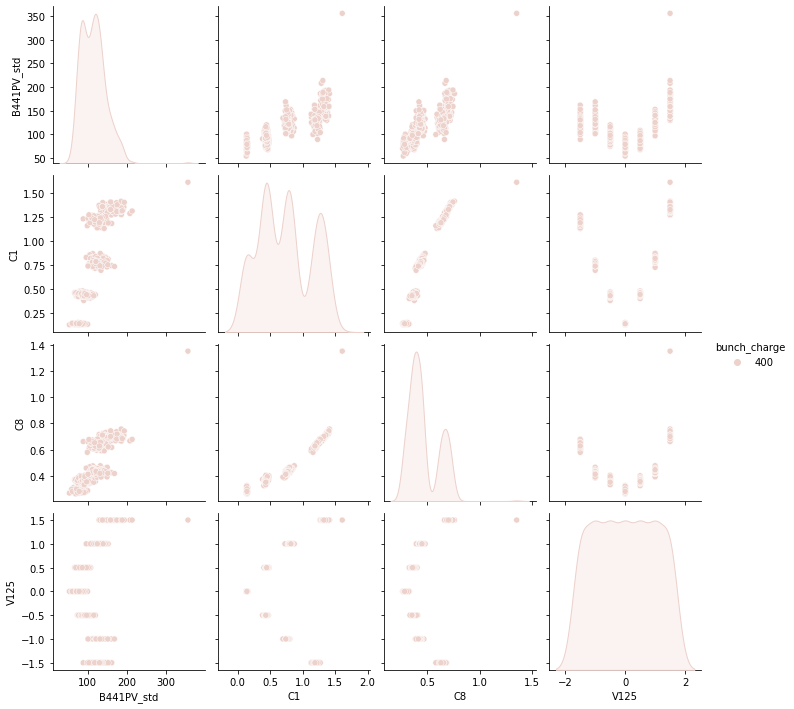

In [83]:
sns.pairplot(df[[output, 'C1', 'C8', 'V125', 'bunch_charge']], diag_kind='kde', hue='bunch_charge') # Just plot some relationships

In [ ]:
plt.plot(df[output])

In [ ]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)
train_dataset.info()
test_dataset.info()

In [ ]:
train_dataset.describe().transpose()

In [ ]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop(output)
test_labels = test_features.pop(output)

In [ ]:
plt.plot(np.array(test_labels))

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [B441PV_var]')
  plt.ylim([0, 50])
  plt.legend()
  plt.grid(True)

In [ ]:
# Linear Regression with multiple inputs 
# Normalization layer
normalizer_array = np.array(train_features)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())
print(normalizer.variance.numpy())

first = np.array(normalizer_array[:1])

with np.printoptions(precision=2, suppress=True):
  print('First example:', first)
  print('Normalized:', normalizer(first).numpy())

In [ ]:
# Build keras sequential model
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
linear_model.summary()

In [ ]:
# Configure the training of the model
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.5),
    loss='mean_absolute_error',
    metrics=['mean_squared_error', 'mean_absolute_percentage_error'])

In [ ]:
%%time
# Execute the training
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=50)
history = linear_model.fit(
    normalizer_array, train_labels, 
    epochs=1000,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2,
    callbacks=[early_stop])

In [ ]:
# Get the training process numbers
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist

In [ ]:
plot_loss(history)

In [ ]:
# Evaluate using the test dataset
test_results = {}

test_results['c1_model'] = linear_model.evaluate(
    test_features,
    test_labels, verbose=0)
test_results

In [ ]:
test_predictions_linear_model = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_linear_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 500]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.legend()

In [ ]:
# Now let's use a DNN
def build_and_compile_model(norm):
  model = keras.Sequential([
      norm,
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(100, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(64, activation='tanh'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),
               metrics=['mean_squared_error', 'mean_absolute_percentage_error'])
  return model

In [ ]:
normalizer_array = np.array(train_features)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(normalizer_array))
print(normalizer.mean.numpy())

In [ ]:
# Now lets do the full model
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

In [ ]:
%%time
early_stop =EarlyStopping(monitor='val_loss', min_delta=0.1, patience=500)
history = dnn_model.fit(
    normalizer_array, train_labels,
    validation_split=0.2,
    verbose=0, epochs=10000,
    callbacks=[early_stop])

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

In [ ]:
plot_loss(history)

In [ ]:
# Evaluate using the test dataset
test_results['dnn_model'] = dnn_model.evaluate(test_features, 
                                               test_labels, verbose=0)
test_results

In [ ]:
test_predictions_dnn_model = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions_dnn_model)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [-100, 700]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [ ]:
# Plot test labels and test predictiones vs sample #
plt.plot(np.array(test_labels), label='labels')
plt.plot(np.array(test_predictions_linear_model), label='linear model')
plt.plot(np.array(test_predictions_dnn_model), label='DNN model')
plt.legend()

In [ ]:
error = (test_predictions_dnn_model - test_labels) * (100/test_labels)

fig = plt.figure()
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [%]', fontsize=14)
_ = plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('hist_resultsD.eps', format='eps')

In [ ]:
fig = plt.figure()
plt.plot(np.array(test_labels), label='Real Values')
plt.plot(np.array(test_predictions_dnn_model), label='Predictions')
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('B441PV_std ' + r'$[\mu m]$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig('NN_resultsD.png', format='png')
#plt.xlim(0,200)

In [ ]:
fig = plt.figure()
plt.plot(np.array(test_labels), label='Real Values')
plt.plot(np.array(test_predictions_dnn_model), label='Predictions')
plt.xlabel('Sample Number', fontsize=14)
plt.ylabel('B441PV_std ' + r'$[\mu s]$', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(1100,1200)

In [ ]:
plt.plot(np.array(error))

In [ ]:
# Let's compare the test results of the models
pd.DataFrame(test_results, index=['Mean absolute error', 'mean_squared_error', 'mean_absolute_percentage_error']).T

Done!